<hr style="border:10px solid #A3AAA7"> </hr>
<h1>About the data set</h1>
<p>Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset</p>

<hr style="border:10px solid #A3AAA7"> </hr>
<h1>Importing packages</h1>

In [1]:
#importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras

#importing numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

<hr style="border:10px solid #A3AAA7"> </hr>
<h1>Creating Dataframes</h1>

In [18]:
#loading dataset
fashion_mnist = keras.datasets.fashion_mnist  

#split into tetsing and training
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  

<hr style="border:10px solid #A3AAA7"> </hr>
<h1>Identifiying Dataset</h1>

In [12]:
#finding dimensions of dataset
train_images.shape

(60000, 28, 28)

In [4]:
#checking individual value 
train_images[0,27,23]

0

In [13]:
#checking first 20 image values
train_images[:20]

array([[[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       ...,

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0

In [14]:
#checking first 20 image labels
train_labels[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

In [5]:
#creating meaningful names for labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

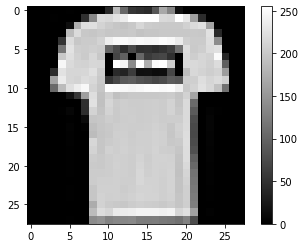

In [7]:
#visualizing relevant images in the dataset
plt.figure()
plt.imshow(train_images[1],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

<hr style="border:10px solid #A3AAA7"> </hr>
<h1>Creating the Model</h1>

In [19]:
#creating neural network 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

#compiling the created model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
train_images.shape

(60000, 28, 28)

In [37]:
#feed data to the model
model.fit(train_images,train_labels,epochs=8,batch_size=1000)

Epoch 1/8
60/60 [==============================] - 1s 12ms/step - loss: 0.5945 - accuracy: 0.7443
Epoch 2/8
60/60 [==============================] - 1s 13ms/step - loss: 0.5863 - accuracy: 0.7448
Epoch 3/8
60/60 [==============================] - 1s 12ms/step - loss: 0.5832 - accuracy: 0.7467
Epoch 4/8
60/60 [==============================] - 1s 12ms/step - loss: 0.5831 - accuracy: 0.7455
Epoch 5/8
60/60 [==============================] - 1s 13ms/step - loss: 0.5819 - accuracy: 0.7476
Epoch 6/8
60/60 [==============================] - 1s 16ms/step - loss: 0.5813 - accuracy: 0.7463
Epoch 7/8
60/60 [==============================] - 1s 17ms/step - loss: 0.5821 - accuracy: 0.7459
Epoch 8/8
60/60 [==============================] - 1s 14ms/step - loss: 0.5795 - accuracy: 0.7463


<hr style="border:10px solid #A3AAA7"> </hr>
<h1>Testing the Model</h1>

In [38]:
#testing the model
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=1,batch_size=10)
print('Test Accuracy',test_acc)

1000/1000 [==============================] - 2s 1ms/step - loss: 0.8984 - accuracy: 0.7270
Test Accuracy 0.7269999980926514


<hr style="border:10px solid #A3AAA7"> </hr>
<h1>Making Predictions</h1>

Pullover


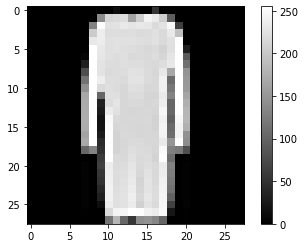

In [48]:
#making predictions for created model
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[25])])

plt.figure()
plt.imshow(train_images[25],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()